<a href="https://colab.research.google.com/github/gabikohen/Ejercicio-de-rbol-de-regresi-n/blob/master/bostonEjercicio_de_%C3%A1rbol_de_regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
## Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
## Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import set_config
set_config(display='diagram')


In [140]:
## Load and Inspect the Data
boston_filepath = '/content/drive/MyDrive/Colab Notebooks/Coding dojo/Introducion al Machine learning/Practica/Boston_Housing_from_Sklearn.csv'
bos_data = pd.read_csv(boston_filepath)

In [141]:
bos_data.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [142]:
bos_data.tail()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
501,0.06263,0.573,6.593,69.1,21.0,9.67,22.4
502,0.04527,0.573,6.120,76.7,21.0,9.08,20.6
503,0.06076,0.573,6.976,91.0,21.0,5.64,23.9
504,0.10959,0.573,6.794,89.3,21.0,6.48,22.0
505,0.04741,0.573,6.030,80.8,21.0,7.88,11.9


In [143]:
bos_data.duplicated().sum()

0

In [144]:
bos_data.isna().sum()

CRIM       0
NOX        0
RM         0
AGE        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64

Data Dictionary
CRIM: índice de criminalidad per cápita por ciudad
NOX: concentración de óxidos nítricos (partes por 10 millones)
RM: número promedio de habitaciones por vivienda
AGE:  proporción de unidades ocupadas por sus propietarios construidas antes de 1940
PTRATIO: proporción de alumnos por profesor por ciudad
LSTAT: % de menor nivel económico de la población
PRICE: Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

1) Realicen un mapa de calor de las correlaciones. Identifiquen cualquier característica que tenga un coeficiente de correlación de magnitud 0,5 (puede ser + o -) o mayor con el precio. Limitaremos nuestros análisis a estas tres características.

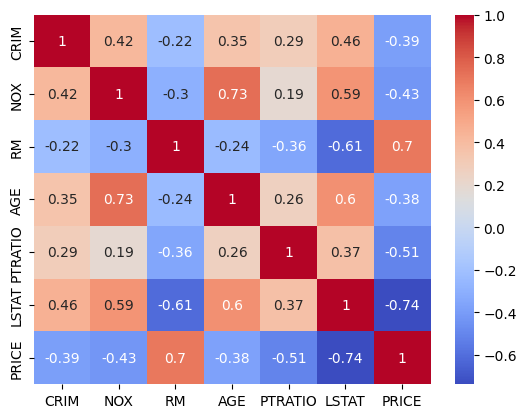

In [145]:
corr = bos_data.corr()
sns.heatmap(corr, cmap = "coolwarm", annot = True);

2) Seleccionen las columnas para la matriz de características (X) y seleccionen el PRECIO para el vector objetivo (y).

In [146]:
#Definir objetivo (y) y características (X)

y = bos_data["PRICE"]
X = bos_data[["RM", "LSTAT", "PTRATIO"]]

In [147]:
len(y)

506

In [148]:
X

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
501,6.593,9.67,21.0
502,6.120,9.08,21.0
503,6.976,5.64,21.0
504,6.794,6.48,21.0


3) Dividan los datos en grupos de entrenamiento y de prueba. ¡Usen el número 42 como semilla aleatoria random_state!

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

4) Instancien el modelo y ajústenlo al conjunto de entrenamiento.

In [150]:
reg = LinearRegression()
scaler = StandardScaler() # Para evitar una fuga de datos
reg_pipe = make_pipeline(scaler, reg) #  permite encadenar varios pasos de procesamiento y modelado en un solo objeto
reg_pipe.fit(X_train, y_train) # entrenar el modelo de regresión



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

5) Evaluar el rendimiento de su modelo en el conjunto de entrenamiento y de prueba usando la puntuación R^2.  ¿Existe alguna diferencia entre el modelo de rendimiento en los datos de entrenamiento vs. los datos de prueba?

In [151]:
train_preds = reg_pipe.predict(X_train)
test_preds = reg_pipe.predict(X_test)
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
r2_train




0.6877966145058925

In [152]:
r2_test

0.6331590458194677

6) Evalúen el modelo usando el error absoluto medio (EAM).

In [153]:
mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)
mae_train

3.714054057158005

In [154]:
mae_test

3.391844829381397

7) Evalúen el modelo usando el error cuadrático medio (ECM).  

In [155]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)
mse_train

27.68673681796949

In [156]:
mse_test

25.68882419667596

8) Evalúen el modelo de rendimiento usando RECM en el conjunto de entrenamiento y de prueba. Esta métrica es útil porque las unidades estarán en las mismas unidas del vector objetivo. En este caso mil dólares.  

In [157]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
rmse_train

5.261818774717492

In [158]:
rmse_test

5.068414367104959